### 1. Se pide: (regression)

A partir del archivo "USA_Housing.csv", realizar la regresión no lineal entre cada columna numérica con la columna 'price' utilizando:

- SVR

In [3]:
import pandas as pd

df = pd.read_csv("USA_Housing.csv")
df.head(5)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386


In [7]:
import numpy as np
from sklearn.svm import SVR
from sklearn import model_selection
import matplotlib.pyplot as plt

In [33]:
def train_svc(df, C=100, gamma=0.1, epsilon=.1, random_state=42):
    kernel = ['rbf', 'linear', 'poly']
    data = {'Column':[], 'Kernel':[], 'Score':[]}
    cols = df.loc[:, :'Area Population'].columns
    for k in kernel:
        svr = SVR(kernel=k, C=C, gamma=gamma, epsilon=epsilon)

        for c in cols:
            X = np.array(df[c]).reshape(-1, 1)
            y = np.array(df.Price)
            X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=random_state)

            model = svr.fit(X_train, y_train)
            data['Column'].append(c)
            data['Kernel'].append(k)
            data['Score'].append(model.score(X_train, y_train))
            
            y_prediction = model.predict(X)

            plt.scatter(X, y, color='royalblue')
            plt.plot(X, y_prediction, color='firebrick')
            plt.title(f'{k}:{c}')
            plt.show()

    df = pd.Dataframe(data)  
    return df

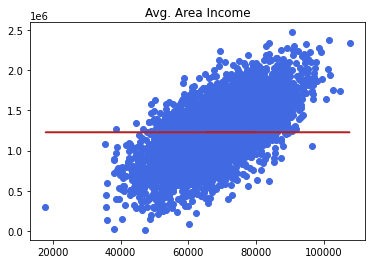

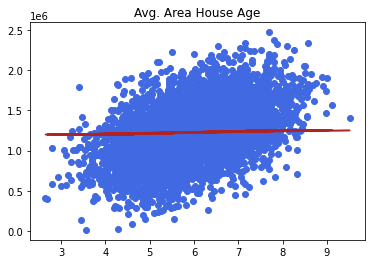

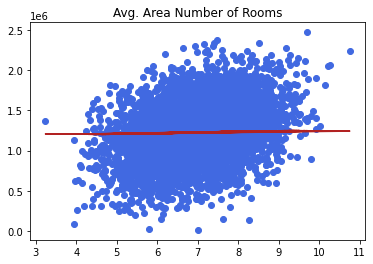

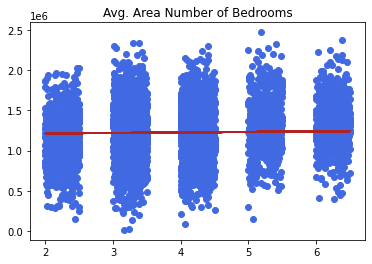

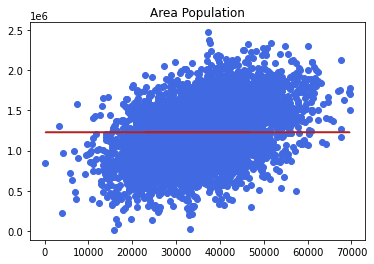

In [34]:
train_svc(df)

### 2. Se pide: (classification)

En el anterior dataset, la columna "Avg. Area Number of Bedrooms" está en un rango numérico limitado:

1. Cambia todos los datos para que sean enteros redondeando hacia el entero más cercano. Si es .5 exacto, se redondea hacia abajo.

2. Cuando lo hayas hecho, tendrás una columna con números enteros en un rango limitado. Ahora trata a esa columna como una serie de valores discretos (classes, labels). 

3. Usando las demás columnas numéricas y una a una, utiliza SVM (SVC) para clasificar esa columna modificada.

4. Usando todas las demás columnas a la vez, utiliza SVM para clasificar esa columna modificada. Es decir, "Avg. Area Income" con nuestro target, después "Avg. Area House Age", ... ¿hace aumentar el score? ¿por qué? 

5. ¿Qué columna tiene mejor correlación con "Avg. Area Number of Bedrooms" una vez modificada? ¿qué columna da mejor score para nuestro target? 

-------------------------- 

ACLARACIÓN del apartado 2 del ejercicio 2:

- En el punto 3, se espera que tu X sea una sola columna e y también, 'Avg. Area Number of Bedrooms'.

- En el punto 4, se espera que tu X sean todas las columnas que cumplen con las características especificadas y la columna 'Avg. Area Number of Bedrooms'